In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("Obesity prediction.csv")

In [19]:
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [20]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [21]:
df.isnull().sum()  # Counts the number of missing values per column

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

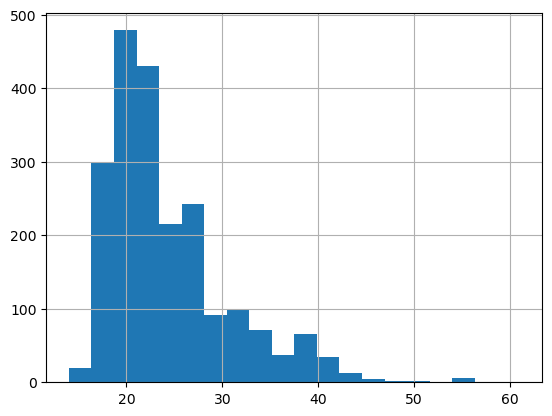

In [22]:
import matplotlib.pyplot as plt
df['Age'].hist(bins=20)  # Histogram for the 'age' column
plt.show()


In [23]:
df['Obesity'].value_counts()  # Count occurrences of each class in the target

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: Obesity, dtype: int64

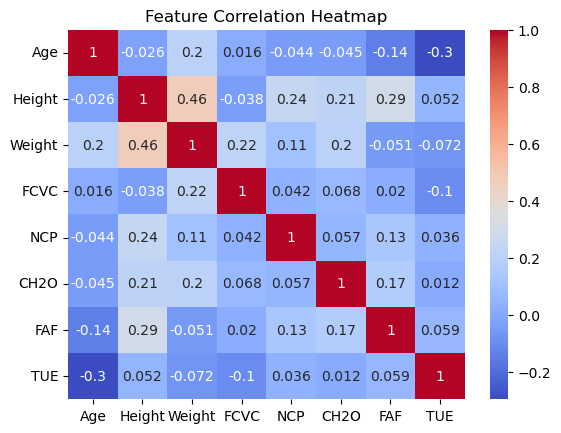

In [24]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

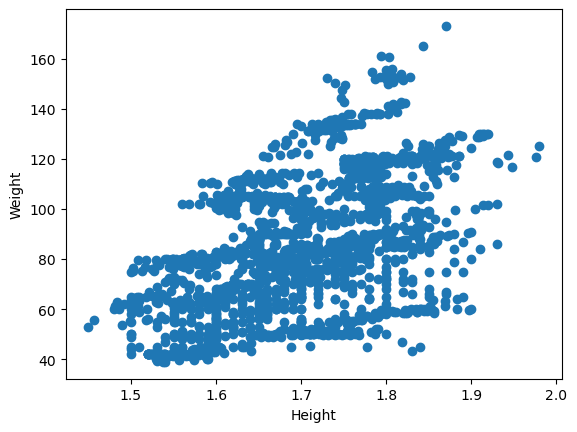

In [25]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


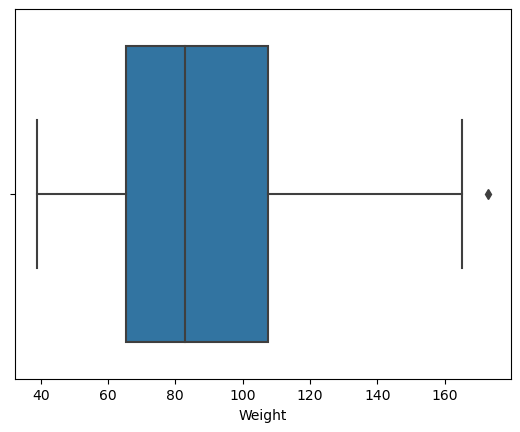

In [26]:

sns.boxplot(x=df['Weight'])
plt.show()



In [27]:
# Filter out rows where weight is greater than 150
df[df['Weight'] <= 150]



,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [28]:
highest_weight = df['Weight'].max()  # Replace 'Weight' with the actual column name for weight
lowest_weight = df['Weight'].min()

highest_height = df['Height'].max()  # Replace 'Height' with the actual column name for height
lowest_height = df['Height'].min()

# Display results
print(f"Highest Weight: {highest_weight} kg")
print(f"Lowest Weight: {lowest_weight} kg")
print(f"Highest Height: {highest_height} cm")
print(f"Lowest Height: {lowest_height} cm")

Highest Weight: 173.0 kg
Lowest Weight: 39.0 kg
Highest Height: 1.98 cm
Lowest Height: 1.45 cm


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [30]:
df['Gender'] = le.fit_transform(df['Gender'])
df['family_history'] = le.fit_transform(df['family_history'])
df['FAVC'] = le.fit_transform(df['FAVC'])
df['SMOKE'] = le.fit_transform(df['SMOKE'])
df['SCC'] = le.fit_transform(df['SCC'])

In [31]:

df = pd.get_dummies(df, columns=['FAF', 'MTRANS', 'CAEC', 'CALC'], drop_first=True)


In [32]:
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,2.000000,...,0,0,1,0,0,1,0,0,0,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,...,0,0,1,0,0,1,0,0,1,0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,2.000000,...,0,0,1,0,0,1,0,1,0,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,2.000000,...,0,0,0,1,0,1,0,1,0,0
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,2.000000,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,1.728139,...,0,0,1,0,0,1,0,0,1,0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,2.005130,...,0,0,1,0,0,1,0,0,1,0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,2.054193,...,0,0,1,0,0,1,0,0,1,0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,2.852339,...,0,0,1,0,0,1,0,0,1,0


In [33]:
print("Columns in Training Data:", df.columns)


Columns in Training Data: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'SMOKE', 'CH2O',
       ...
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no'],
      dtype='object', length=1212)


In [34]:
X = df.drop(columns=['Obesity'])
y = df['Obesity']


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression;
from sklearn.neighbors import KNeighborsClassifier

In [37]:
LR = LogisticRegression (solver='saga', multi_class = 'auto', max_iter=3000)

KNN = KNeighborsClassifier()

In [ ]:
LR.fit(X_train, y_train)
KNN.fit(X_train, y_train)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, KNN.predict(X_test)))

print(classification_report(y_test, KNN.predict(X_test)))

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Instantiate the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model on training data
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],  # No limit, or limit to certain depth
    'min_samples_split': [2, 5, 10],  # Minimum samples for splitting nodes
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at leaf nodes
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider
    'criterion': ['gini', 'entropy'],  # Split quality measure
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model to training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Decision Tree Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred))

# Display the best hyperparameters found by GridSearchCV
print("\nBest Hyperparameters:")
print(best_params)


In [ ]:
dt_model = DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, random_state=42)

# Fit the model on training data
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import joblib
joblib.dump(dt_model,'obesity_model.pkl')

In [28]:
model=joblib.load('obesity_model.pkl')